# EDA(Titanic Dataset)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading dataset
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.isnull().sum().sum()

866

<AxesSubplot: xlabel='Pclass', ylabel='Survived'>

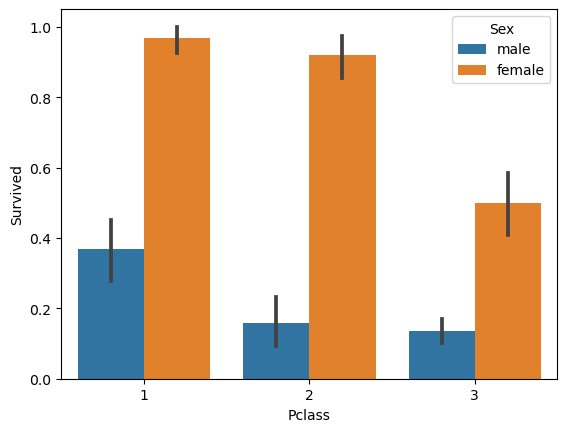

In [5]:
sns.barplot(df, y=df['Survived'], x =df['Pclass'], hue = df['Sex'])

## Why to do Exploratory Data Analysis?
- Model Building
- Analysis and reporting
- Handling Missing Values
- Validate Assumptions
- Feature Enigneering
- Detecting Outliers (crucial part)
#### It is an iterative process

## 1) Label Columns
## lets note down the type of columns
- Numerical Data : PassengerId, Age, Fare
- Categorical Data : Survived, Pclass, Sex,Sibsp, Parch, Embarked
- Mixed : Name, Ticket, Cabin

## 2) Univariate Analysis(single column)
- It focuses on analyzing each feature in the dataset independently
### Distribution Analysis : 
- The distribution of each feature is examined to identify its shape, central tendency, and dispersion(Range, Variance, Standard deviation, Interquartile range)
### Identifying Potential Analysis : 
- Outliers, Skewness, 


# Lets work on Numerical Columns

### 1) Age Column
#### Conclusions:
- Age is normally(almost) distributed
- 20% of the values are missing
- There are some outliers

In [6]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

(array([40., 14., 15., 31., 79., 98., 85., 84., 73., 45., 35., 35., 29.,
        16., 13., 11.,  4.,  5.,  1.,  1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <BarContainer object of 20 artists>)

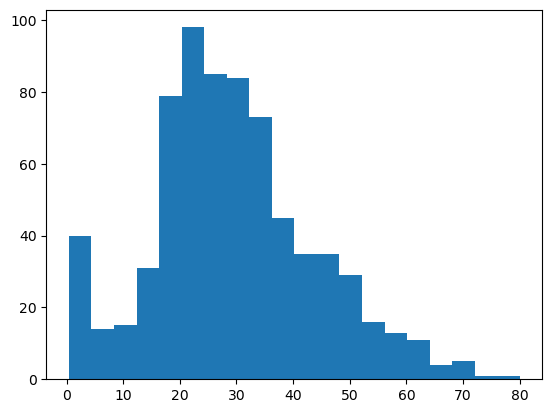

In [7]:
plt.hist(df['Age'], bins=20)

<AxesSubplot: ylabel='Density'>

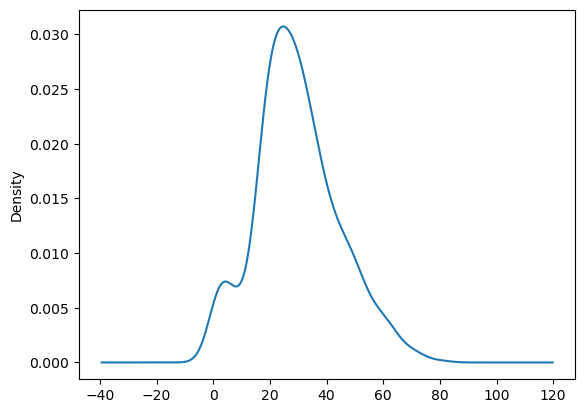

In [8]:
df['Age'].plot(kind='kde')

In [9]:
# If the skew is close to zero than its normal distribution
df['Age'].skew()

0.38910778230082704

<AxesSubplot: >

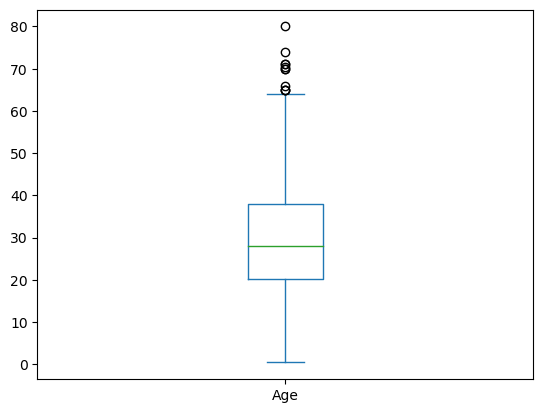

In [10]:
df['Age'].plot(kind='box')

In [11]:
df[df['Age'] > 65]
# It seems like the outlier data is valid, bcz of age is higher it shows outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


### Fare Column
#### conclusions :
- The data is highly(positively) skewed
- Fare column actually contains group fare, not individual fare
- we need to create a new col called individual fare

In [12]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot: ylabel='Frequency'>

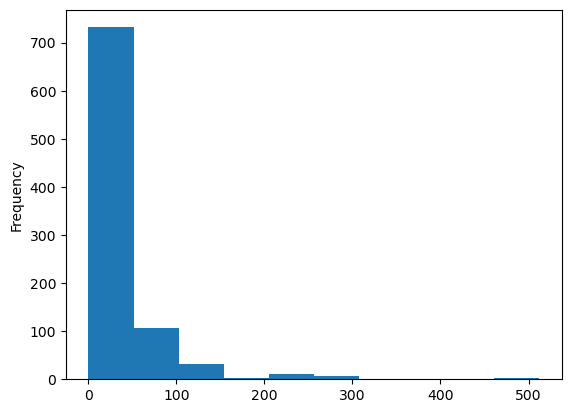

In [13]:
df['Fare'].plot(kind='hist')

<AxesSubplot: ylabel='Density'>

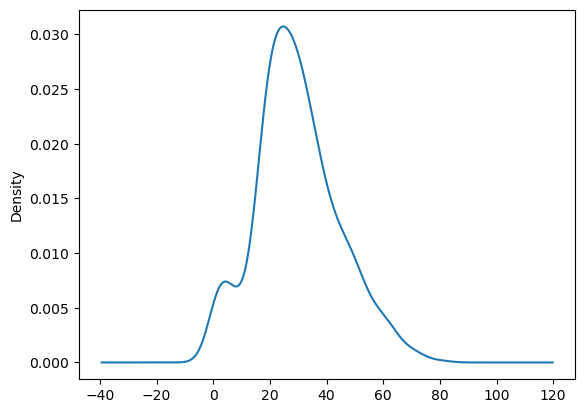

In [14]:
df['Age'].plot(kind='kde')

In [15]:
df['Fare'].skew()
# This is highly positively skewed(when you try to do statistical test, it gives errors)

4.787316519674893

<AxesSubplot: >

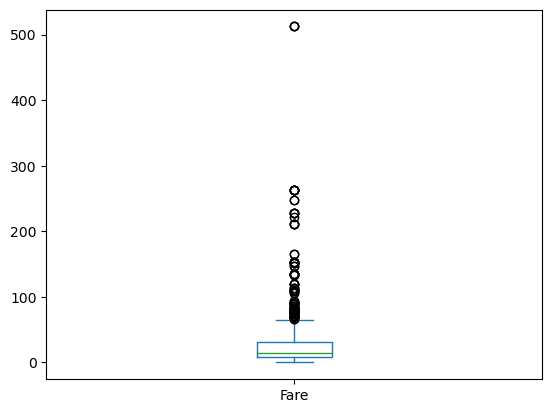

In [16]:
df['Fare'].plot(kind='box')

In [17]:
df[df['Fare'] > 250]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


#### The Fare of some of the passengers is given by family wise ticket fare, we need to separate this fare for each individual in a family

# Lets work on Categorical Columns

### 3) Survived Column
#### Conclusion:
- Morethan 50% died in this accident
- There are no null values

In [18]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0, 0.5, 'Count of passengers')

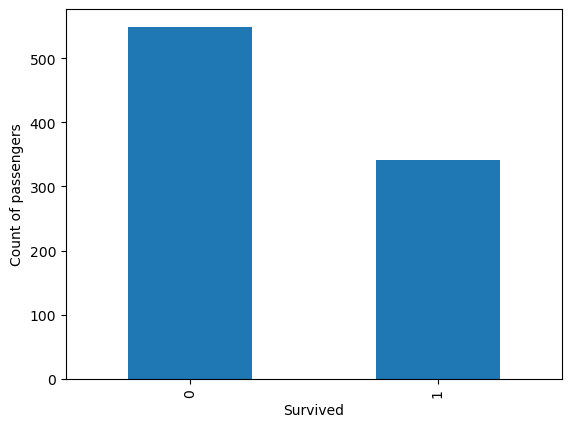

In [19]:
df['Survived'].value_counts().plot(kind='bar')
plt.xlabel('Survived')
plt.ylabel('Count of passengers')

<AxesSubplot: ylabel='Survived'>

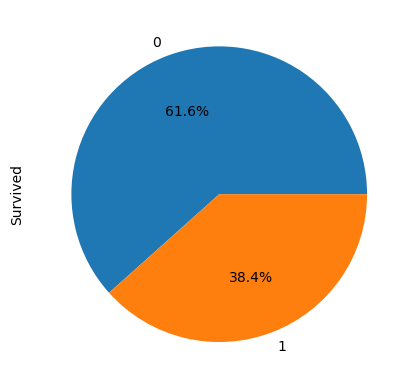

In [20]:
df['Survived'].value_counts().plot(kind='pie', autopct='%0.1f%%')
# Accident was very deadly, morethan 50% died

In [21]:
df['Survived'].isnull().sum()

0

### 2) Pclass
#### Conclusions
- Lot of people travelled in Pclass -3
- There are no null values


In [22]:
df['Pclass'].value_counts()
# there are less people travelling in Pclass = 2, and more people in pclass=1(need to compare with fare)

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot: >

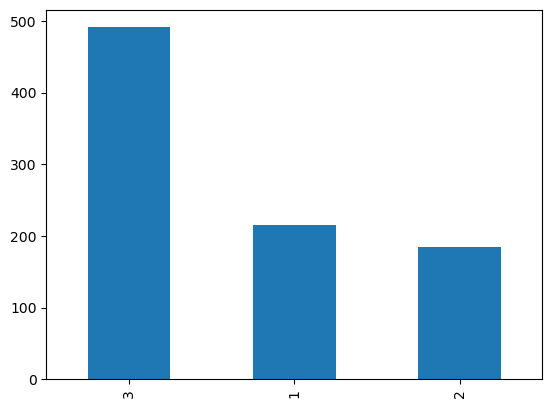

In [23]:
df['Pclass'].value_counts().plot(kind='bar')

<AxesSubplot: ylabel='Pclass'>

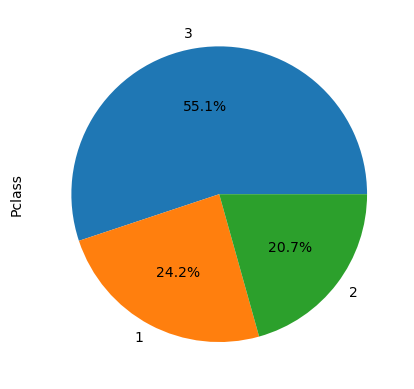

In [24]:
df['Pclass'].value_counts().plot(kind='pie', autopct='%0.1f%%')

In [25]:
df['Pclass'].isnull().sum()

0

### 3) Sex
#### Conclusions
- The count of male is so high
- There are no missing values

In [26]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot: >

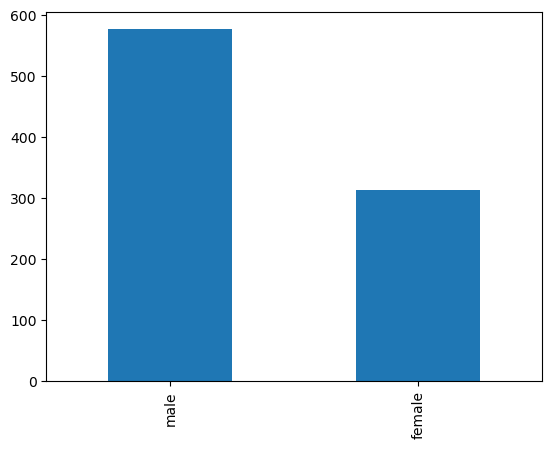

In [27]:
df['Sex'].value_counts().plot(kind='bar')

<AxesSubplot: ylabel='Sex'>

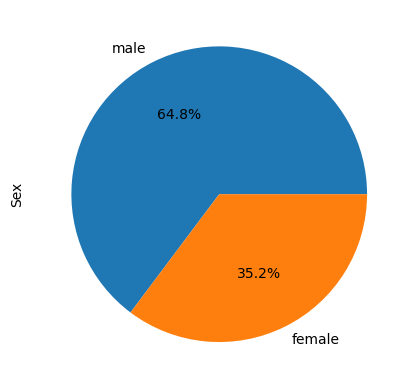

In [28]:
df['Sex'].value_counts().plot(kind='pie', autopct='%0.1f%%')

In [29]:
df['Sex'].isnull().sum()

0

### 4) SibSp
#### conclusions
- Parent child and SibSp can be merged to from a new column called family size
- Create a new column called is_alone (as there are lot of single persons travelling)

In [30]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<AxesSubplot: ylabel='SibSp'>

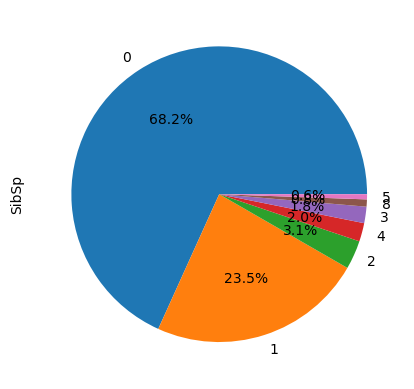

In [31]:
df['SibSp'].value_counts().plot(kind='pie', autopct='%0.1f%%')

<AxesSubplot: >

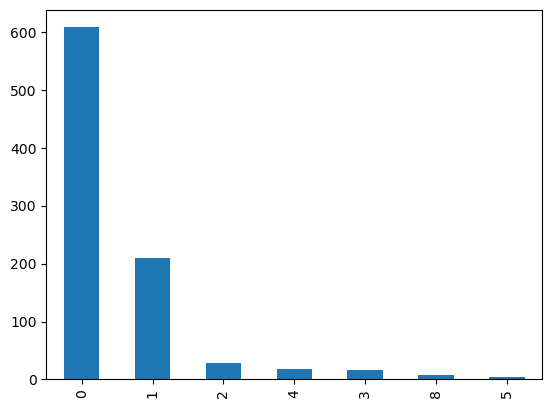

In [32]:
df['SibSp'].value_counts().plot(kind='bar')

### 5) Embarked --> stops where the titanic stopped from southampton to newyork
#### Conclusions
- we can see 644 people travelled in titanic from shiboc and 168 from 'C' and 77 from 'Q'
- There are 2 missing values 

In [33]:
df['Embarked'].value_counts()
# we can see 644 people travelled in titanic from shiboc and 168 from 'C' and 77 from 'Q'

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot: >

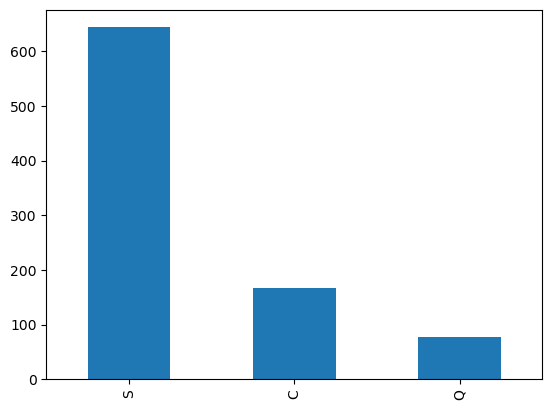

In [34]:
df['Embarked'].value_counts().plot(kind='bar')

In [35]:
df['Embarked'].isnull().sum()

2

## Bivariate Analysis
- Select 2 cols

- Understand type of relationship

#### Numerical - Numerical
- a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots
- b. Check correlation coefficent to check linear relationship

#### Numerical - Categorical - 
- create visualizations that compare the distribution of the numerical data across different categories of the categorical data.
- a. You can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots

#### Categorical - Categorical
- a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.
- b. You can plots like heatmap, stacked barplots, treemaps
#### Write your conclusions.

In [36]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


/var/folders/fn/wz542gys40z4t4dnd28rwlkc0000gn/T/ipykernel_17177/58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

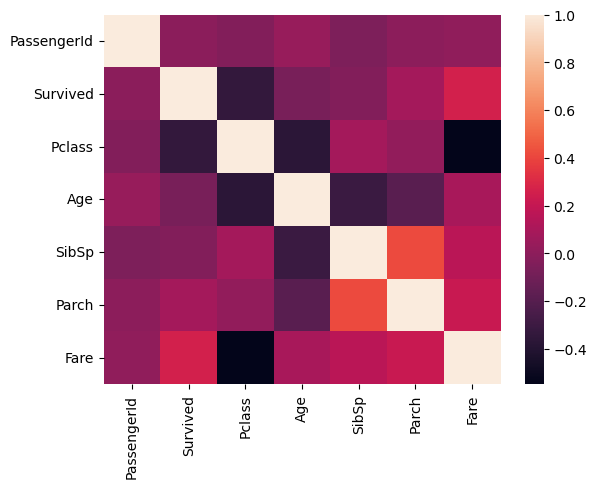

In [37]:
sns.heatmap(df.corr())

### Select important column(eg: target varaible and missing values) and do bivariate analysis with another feature in the dataset.

## Lets take 2 categorical variables, we will do contiguency table/crosstab to analyze 2 features  

In [38]:
crosstab = pd.crosstab(df['Survived'], df['Pclass'], normalize='columns')*100
crosstab

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


#### from the above observations we can see that the Pclass-3 is the most dangerous class as more than 75% people died in plcass-3. Pclass-1 is the best class as morethan 62% people survived

<AxesSubplot: xlabel='Pclass', ylabel='Survived'>

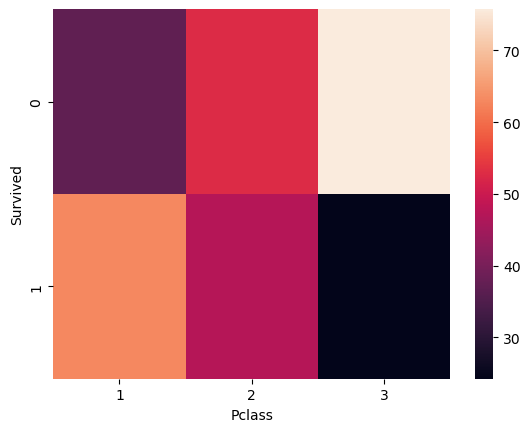

In [39]:
sns.heatmap(crosstab)

In [40]:
# 2 categorical variables
pd.crosstab(df['Survived'], df['Sex'], normalize='columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


#### from the above observation we can see 74% of female people survived, and 19% of male survived 

In [41]:
pd.crosstab(df['Survived'], df['Embarked'], normalize='columns')*100

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


In [42]:
pd.crosstab(df['Sex'], df['Embarked'], normalize='columns')*100

Embarked,C,Q,S
Sex,,,
female,43.452381,46.753247,31.521739
male,56.547619,53.246753,68.478261


In [43]:
pd.crosstab(df['Pclass'], df['Embarked'], normalize='columns')*100

Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.720497
2,10.119048,3.896104,25.465839
3,39.285714,93.506494,54.813665


#### There are more people who travelled in Pclass-1, where the survived ratio is more for the passend who Embarked from chibock ='C'

## Lets do Bivariate analysis on Numerical-Categorical Variables
- create visualizations that compare the distribution of the numerical data across different categories of the categorical data.
- a. You can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots

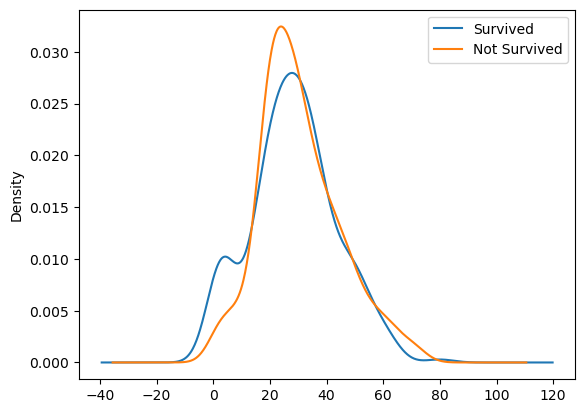

In [44]:
df[df['Survived']==1]['Age'].plot(kind='kde', label='Survived')
df[df['Survived'] ==0]['Age'].plot(kind='kde', label='Not Survived')
plt.legend()
plt.show()

#### From the above graph we can see
- The survival chance of children age between(0-5), the survival chance is more then non-survival
- The survival chance old people age more than 60 is very less

# Feature Engineering
## Lets do Feature Engineering(creating new columns) from an existing column

In [45]:
# lets focus on Fare column - as the Fare is given for family in some rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [47]:
df[df['SibSp'] == 8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [48]:
df[df['Ticket'] == 'CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


#### There should be 11 family members in the data, but only 8 are there. remaining are in test data set, lets load and combine the dataset for complete data

### loading test dataset

In [49]:
df1 = pd.read_csv('test.csv')
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [50]:
df = pd.concat([df, df1])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
len(df[df['Ticket'] == 'CA. 2343'])

11

In [52]:
df[df['Ticket'] == 'CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0.0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0.0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0.0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0.0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0.0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
188,1080,NaN,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S
342,1234,NaN,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S
360,1252,NaN,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S


#### Lets create a new column of individual fare

<AxesSubplot: >

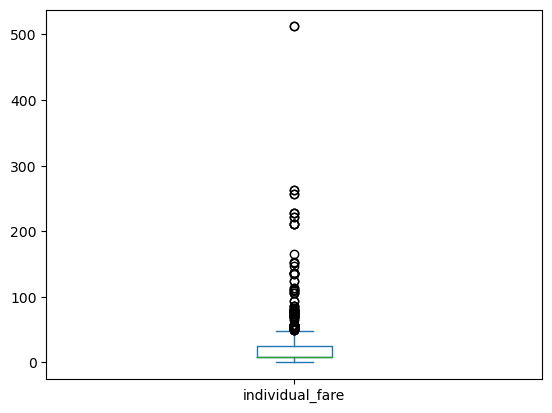

In [53]:
df['individual_fare'] = df['Fare']/(df['SibSp'] + df['Parch'] + 1)
df['individual_fare'].plot(kind='box')

In [54]:
df[['individual_fare', 'Fare']].describe()

,individual_fare,Fare
count,1308.000000,1308.000000
mean,20.518215,33.295479
std,35.774337,51.758668
min,0.000000,0.000000
25%,7.452767,7.895800
50%,8.512483,14.454200
75%,24.237500,31.275000
max,512.329200,512.329200


In [55]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.62500
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.64165
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.92500
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.55000
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.05000


#### lets create another new column by the name of family size using SibSp, Parch

In [56]:
df['family_size'] = df['SibSp'] + df['Parch'] + 1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.62500,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.64165,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.92500,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.55000,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.05000,1


#### Lets create a new column by name of Family_type 
- 1 -> alone
- 2-4 -> small
- 5 -> large

In [57]:
# lets create a function for family type
def family_size(num):
    if num == 1:
        return 'alone'
    elif num>1 and num <5:
        return 'small'
    else:
        return 'large'

In [58]:
df['family_type'] = df['family_size'].apply(family_size)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.62500,2,small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.64165,2,small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.92500,1,alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.55000,2,small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.05000,1,alone


<AxesSubplot: >

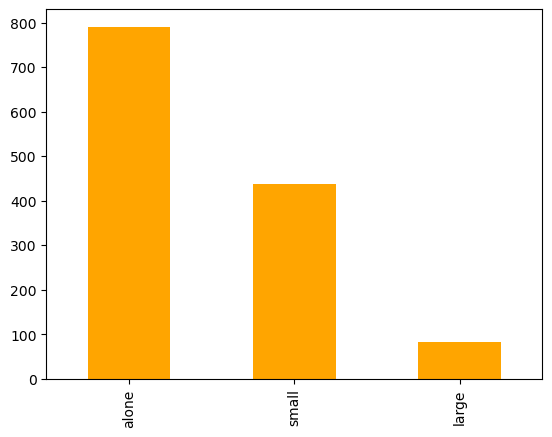

In [77]:
df['family_type'].value_counts().plot(kind='bar', color='orange')

In [60]:
# lets do bivariate analysis on family type and survived column

pd.crosstab(df['Survived'], df['family_type'], normalize='columns') * 100

# 0 -> not survived
# 1-> survived

family_type,alone,large,small
Survived,,,
0.0,69.646182,83.870968,42.123288
1.0,30.353818,16.129032,57.876712


#### From above we can conclude that there is an higher chance to survive if your family type is large

### Lets create new column by the name of surname from the column 'Name'

In [61]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.62500,2,small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.64165,2,small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.92500,1,alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.55000,2,small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.05000,1,alone


In [62]:
df['Surname'] = df['Name'].str.split(',').str.get(0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type,Surname
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.62500,2,small,Braund
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.64165,2,small,Cumings
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.92500,1,alone,Heikkinen
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.55000,2,small,Futrelle
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.05000,1,alone,Allen


In [63]:
df['Title'] = df['Name'].str.split(',').str.get(1).str.strip().str.split(' ').str.get(0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type,Surname,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.62500,2,small,Braund,Mr.
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.64165,2,small,Cumings,Mrs.
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.92500,1,alone,Heikkinen,Miss.
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.55000,2,small,Futrelle,Mrs.
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.05000,1,alone,Allen,Mr.


In [64]:
df['Title'].value_counts()

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
the            1
Jonkheer.      1
Dona.          1
Name: Title, dtype: int64

In [65]:
# df['Title'] = df['Title'].str.replace('Rev', 'Other')
# df['Title'] = df['Title'].str.replace('Dr.', 'Other')
# df['Title'] = df['Title'].str.replace('Col', 'Other')
# df['Title'] = df['Title'].str.replace('Major', 'Other')
# df['Title'] = df['Title'].str.replace('Don.', 'Other')
# df['Title'] = df['Title'].str.replace('the', 'Other')
# df['Title'] = df['Title'].str.replace('Jonkheer.', 'Other')
# df['Title'] = df['Title'].str.replace('Dona.', 'Other')

In [66]:
df['Title'].value_counts()

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
the            1
Jonkheer.      1
Dona.          1
Name: Title, dtype: int64

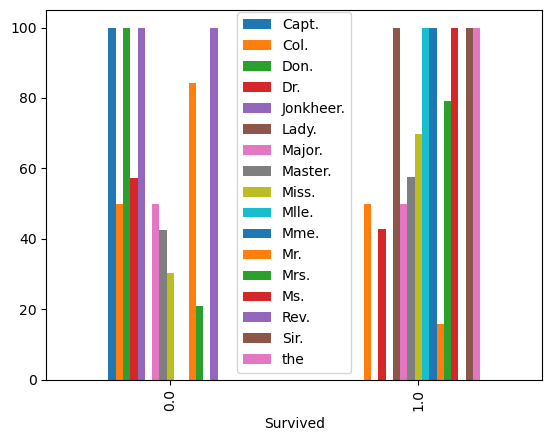

In [73]:
(pd.crosstab(df['Survived'], df['Title'], normalize='columns') * 100).plot(kind='bar',).legend()


## Cabin also has lot of information 
### lets create a new column by the name of deck using 'Cabin' column

In [69]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type,Surname,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.62500,2,small,Braund,Mr.
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.64165,2,small,Cumings,Mrs.
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.92500,1,alone,Heikkinen,Miss.
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.55000,2,small,Futrelle,Mrs.
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.05000,1,alone,Allen,Mr.


In [80]:
df['Cabin'].fillna('M', inplace=True)

In [84]:
df['deck'] = df['Cabin'].str.get(0)
df['deck'].value_counts()

M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: deck, dtype: int64

In [87]:
pd.crosstab(df['deck'], df['Pclass'])

Pclass,1,2,3
deck,,,
A,22,0,0
B,65,0,0
C,94,0,0
D,40,6,0
E,34,4,3
F,0,13,8
G,0,0,5
M,67,254,693
T,1,0,0


<AxesSubplot: xlabel='deck'>

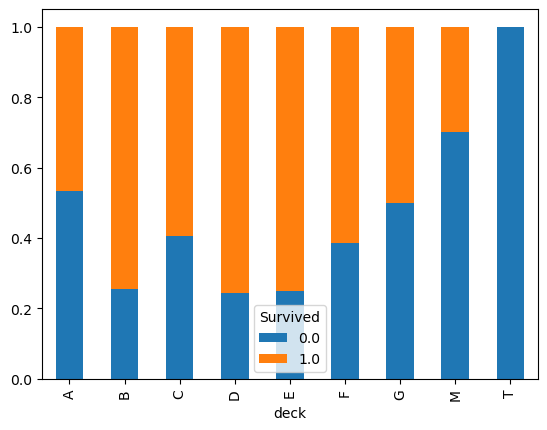

In [96]:
pd.crosstab(df['deck'], df['Survived'], normalize='index').plot(kind='bar', stacked=True)

#### Survival chance is also depends up on the deck as the deck is more lower or more higher top the survival chance is less.

In [102]:
df.corr()['Survived']

/var/folders/fn/wz542gys40z4t4dnd28rwlkc0000gn/T/ipykernel_17177/2226390551.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Survived']


PassengerId       -0.005007
Survived           1.000000
Pclass            -0.338481
Age               -0.077221
SibSp             -0.035322
Parch              0.081629
Fare               0.257307
individual_fare    0.221600
family_size        0.016639
Name: Survived, dtype: float64

#### For EDA on more than 2 columns we use
Paitlot, facetgrid

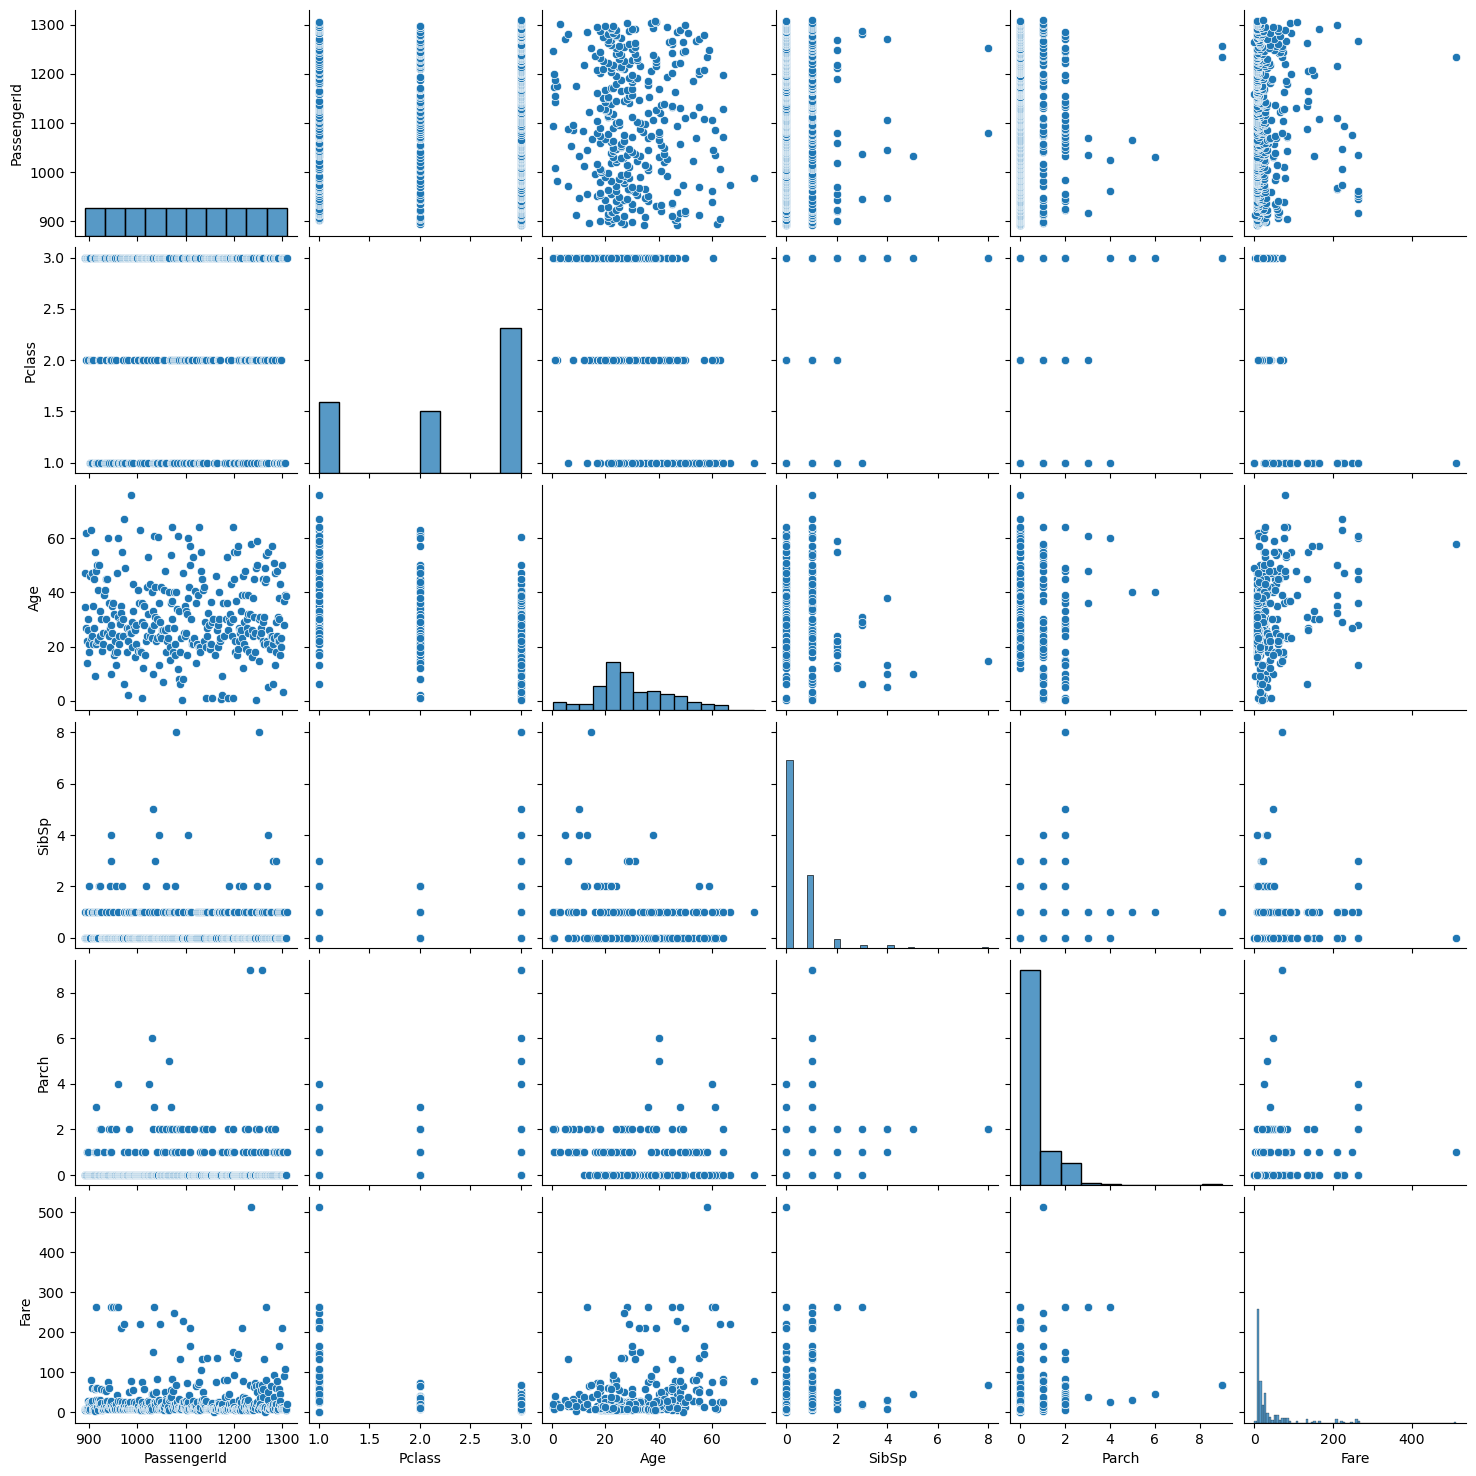

In [105]:
sns.pairplot(df1)